In [88]:
from modsim import *

In [89]:
init_state = State(s=89, i=1, r=0)
show(init_state)

,state
s,89
i,1
r,0


In [90]:
init_state /= init_state.sum()
show(init_state)

,state
s,0.988889
i,0.011111
r,0.000000


In [91]:
tc = 2 #time between contact in days
tr = 7 #recovery time in days

In [92]:
beta = 0.01 / tc
gamma = 1 / tr

In [93]:
def make_system(beta, gamma):
    init = State(s=89, i=1, r=0)
    init /= init.sum()
    return System(init=init, t_end = 94, beta= beta, gamma = gamma)

In [94]:
system = make_system(beta,gamma)
show(system)

,value
init,s 0.988889 i 0.011111 r 0.000000 Name...
t_end,94
beta,0.5
gamma,0.142857


In [95]:
def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r
    infected = system.beta * s * i
    recovered = system.gamma * i
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(s=s, i=i, r=r)

In [96]:
state = update_func(0, init_state, system)
show(state)

,state
s,0.983395
i,0.015018
r,0.001587


In [97]:
#simulation step
def run_simulation1(system, update_func):
    state = system.init
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
    return state


In [98]:
final_state = run_simulation1(system, update_func)
show(final_state)

,state
s,0.025819
i,0.000016
r,0.974165


In [99]:
def run_simulation2(system, update_func):
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    
    state = system.init
    S[0], I[0], R[0] = state
    
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
        S[t+1], I[t+1], R[t+1] = state.s, state.i, state.r
    return S, I, R


In [100]:

S, I, R = run_simulation2(system, update_func)

In [101]:

def plot_results(S, I, R):
    S.plot(style='--', label = 'Susceptible')
    I.plot(style='-', label = 'Infected')
    R.plot(style=':', label = 'Recovered')
    decorate(xlabel='Time(days)', ylabel = 'Fraction of population')

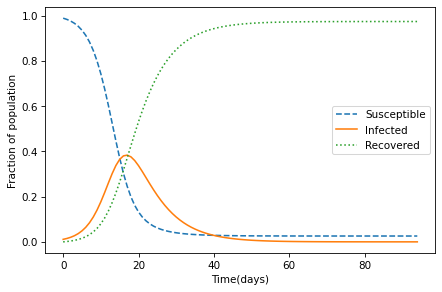

In [102]:
plot_results(S, I, R)

In [103]:
def run_simulation3(system, update_func):
    frame = TimeFrame(columns = system.init.index)
    frame.loc[0] = system.init
    
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    return frame

results = run_simulation3(system, update_func)
results.head()
    

,s,i,r
0,0.988889,0.011111,0.000000
1,0.983395,0.015018,0.001587
2,0.976011,0.020256,0.003733
3,0.966126,0.027248,0.006626
4,0.952963,0.036518,0.010519
